In [1]:
import sys
sys.path.append("../../learntools")

from learntools.core import binder; binder.bind(globals())
from learntools.TPM2.ex1 import *
print("Setup complete! You're ready to start question 0.")

Setup complete! You're ready to start question 0.


# Poisson equation in 1D

Here, we propose to solve the Poisson equation over a 1D domain:

$$
\epsilon_0 \nabla_x  \left[ \epsilon_r(x) \nabla_x V(x) \right] = - \rho(x),  0<x<L_x
$$

# In the plasma between two metallic walls
Is this section, we do not model any dielectric material.
Hence, we consider $\epsilon_r(x) = 1$

## Exercice 1: Discretisation
We discretize the domain $x = [0, L_x]$ in $N$ cells of size $d_x$. The center of each cell is defined by the index $i$.
The unknown potential $\phi(x)$ becomes $V_i$ and the source term $\rho(x)$ becomes $d_i$.

### The volume
Find the coeficients $V_{e,i}$, $V_{w,i}$ and $V_{c,i}$ using the _finite volume_ discretisation in 1D:

$$
V_{e,i} V_{i+1} + V_{w,i} V_{i-1} - V_{c,i} V_{i} = d_i
$$

Do not take care of the boundary for now.

_____________
Type your answer here
______________

In [5]:
%load_ext autoreload
%autoreload 2

In [9]:
q0.hint()  # Uncomment this line to have access to the hint

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Two answer this question, use the Latex langage for equations (you can look that the other equations in the notebooks by double-cliking on the markdown cells)

I expect in the question the diffinitions of $V_{e,i}$ (and other) as function of $d_x$ the cell size, and XXX
    

### The boundary conditions
The center of the cell $i=1$ correspond to $x=0$, and $i = N$ correspond to $x=L_x$.
Write the equation for $V_1$ and $V_N$ for the following cases:
1. Dirichlet condition: the anode in $i=1$ is at a voltage of $U_a$ and the cathode in $i=N$ at $U_c$
2. Neumann condition: no electric field at the anode nor the cathode
3. Periodic conditions


_____________
Type your answer here for the 3 cases
______________


### Linear system
Summarize the discretised Poisson equation by expressing the matrix $A$ and the vector $d$, such that $A\cdot V = d$ in the case of the Dirichlet condition, with $V$ the unkown vector $V=\{V_i\}_{1<i<N}$.

_____________
Type your answer here
______________

## Resolution of the linear equation

Complete the function `thomas` below to solve the following tridiagonal system :
\begin{equation}\label{tridiagonal}
   \begin{bmatrix}
    b_1&c_1&      &       &       &        \\
    a_2&b_2& c_{2}&       &       &        \\
       &a_3& b_{3}&c_{3}  &       &        \\
       &   &\ddots&\ddots &\ddots &        \\
       &   &      &a_{N-1}&b_{N-1}& c_{N-1}\\
       &   &      &       &a_N    & b_{N}
\end{bmatrix}\cdot\begin{bmatrix}
    V_1 \\ V_2 \\ V_3 \\ \dots \\ V_{N-1} \\ V_N    
\end{bmatrix}=\begin{bmatrix}
    d_1  \\ d_2  \\ d_3  \\ \dots \\ d_{N-1} \\ d_N      
\end{bmatrix}
\end{equation}

The Thomas algorithm can be found [here](https://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm). 
There are two methode proposed: one  using other vectors (noted $c'$ etc.), and another "in place" (the input vector are changed). 

Please use the 1st method.

In [1]:
import numpy as np

In [2]:
def thomas(a, b, c, d):
    """arguments: a,b,c and d, four vector of same size
    Return x a vector of the same size of a"""
    
    N = len(a)
    "Verifying that the inputs are correct"
    assert len(b)== N and len(c) == N and len(d) == N, "the arguments are not of the same lenght"
    
    V = np.zeros_like(a)
    
    #~~~~~~~~~~~~~~~~~~~~~~~~
    # Write your code here
    #~~~~~~~~~~~~~~~~~~~~~~~~
    
    return V

In [3]:
"""Verification of the function
We generate a random tri-diagnonal $A$ matrix as well as a random solution $x_{theo}$,
and calculate the source therm `b` that solve $A x_{theo} = b$ """

def tridiag(a, b, c, k1=-1, k2=0, k3=1):
    """Return a tridiagonal matrix """
    return np.diag(a[1:], k1) + np.diag(b, k2) + np.diag(c[:-1], k3)

N = 40
a, b, c, xtheo = [ np.random.rand(N) for i in range(4)]
A = tridiag(a, b, c)
d = A.dot(xtheo)

x = thomas(a, b, c, d)
assert np.allclose(x,xtheo), "the function `thomas` is incorrect"
print("Residu", np.sum(np.abs(x - xtheo)))

AssertionError: the function `thomas` is incorrect

## Solving the Poisson equation with Thomas' algorithm for 2 very simple source terms

Use the `thomas` function you have written to solve the poisson equation of question 2.1.3 for the different cases:
1. No charge density ($\rho = 0$)
1. Uniform charge density ($\rho = 1$)

For each case, plot the results using `matplotlib.pyplot`, and analyse the results briefly


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('./presentation.mplstyle')  # improve the matplotlib figure with custom style

**1. No charge density**

In [5]:
Ua = 10  # Anode potential
Uc = 0   # Cathode potential
N = 50   # Number of points that discretize the domain
Lx = 1   # size of the domain

In [6]:
""" No charge density: resolution"""

# write your code here

' No charge density: resolution'

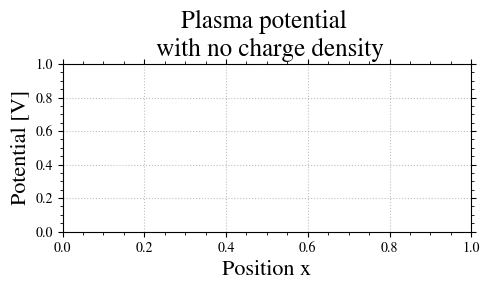

In [7]:
"""No charge density: results"""
plt.figure(figsize=(5,3))
plt.title("Plasma potential \n with no charge density")
plt.ylabel("Potential [V]")
plt.xlabel("Position x")
plt.tight_layout()
# Genergate the figure here

**1. Uniform charge density**

In [8]:
b = np.ones(N)  # source therm

In [9]:
""" Uniform charge density: resolution"""

# write your code here

' Uniform charge density: resolution'

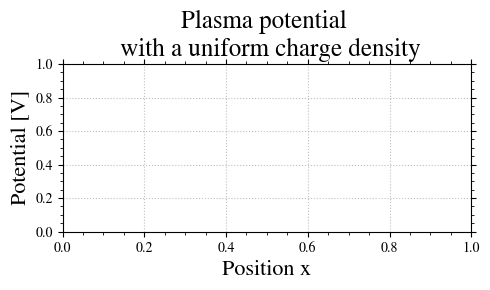

In [10]:
"""No charge density: results"""
plt.figure(figsize=(5,3))
plt.title("Plasma potential \n with a uniform charge density")
plt.ylabel("Potential [V]")
plt.xlabel("Position x")
plt.tight_layout()
# Genergate the figure here

# Use of a manufactured solution : a method to test the solver for a more complex source term

In order to validate the solver, the usual approach is to use a _manufactured solution_ : first, an analytical potential is chosen (which matches the boundary conditions). With this chosen potential, the analytical calculation of the left hand side of Poisson's equation is carried out to derive the analytical expression of the source term. To check the solver, the analytical source term is implemented and we check if the calculated potential is equal to the initial analytical potentiel chosen initially. 
This is an efficient way to check the solver for conditions closer to those encountered during the plasma simulations.

In this section, we propose to test this method.

1. Choose an arbitrary analytical solution $\phi_{theo}(x)$ (using a trigonometric function, polynoms or anything else)
2. Find $\rho_{theo}(x) = - \epsilon_0 \Delta_x \phi_{theo}(x)$ 
3. Solve $\phi_{num}$ using the `thomas` function, and compare it to $\phi_{theo}$


In [ ]:
def phi_theo(x):
    """your defined solution"""
    # your code here
    return phi
    
def rho_theo(x):
    """your defined source term"""
    # your code here
    return rho

In [ ]:
"""Solving phi for rho_theo"""
# your code here

_____________________________
Your comments here
______________________

# Calculation of the electric field

**optional question : please proced to TP2 and TP3 if you don't have time for these questions**

For plasma simulations, the key quantity for the transport of charges particles and electron-impact reaction rate coefficients is the electric field. Therefore it is important to derive the electric field from the potential.

We need to calculate the electric field at different locations : at the interface between the cells (for transport terms) **and** at the center of the cells (for source terms).

In this section, you have to derive the electric field at both locations for the test-case of the previous section ( with the manufactured solution). Compare your results on the electric field with the one you can derive directly analytically.


In [ ]:
"""Electric field at the interfaces between the cells"""
# Your code here


In [ ]:
"""Electric field at the center of the cells"""
# Your code here
